# Pattern match
### Task: Сделайте self фото на некотором расстоянии от камеры с поднятой рукой. Сделайте crop вашей руки - это ваш шаблон. Исходное изображение - это матрица в которой вы будете искать шаблон.

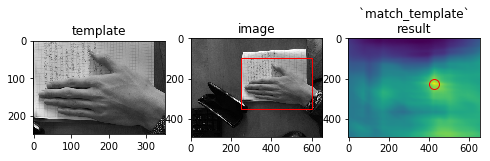

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from skimage import data
from skimage.feature import match_template

template_or = pltimg.imread('.\\ex1.jpg')

r, g, b = template_or[:,:,0], template_or[:,:,1], template_or[:,:,2]
or_gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
hand = or_gray[100:350, 250:600]

result = match_template(or_gray, hand, pad_input=True)
ij = np.unravel_index(np.argmax(result), result.shape, order ='C')
x, y= ij[::-1]

fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2, adjustable='box-forced')
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2, adjustable='box-forced')

ax1.imshow(hand, cmap=plt.cm.gray)
ax1.set_title('template')

ax2.imshow(or_gray, cmap=plt.cm.gray)
ax2.set_title('image')
# highlight matched region
hhand, whand = hand.shape
rect = plt.Rectangle((250, 100), whand, hhand, edgecolor='r', facecolor='none')
ax2.add_patch(rect)
ax3.imshow(result)
ax3.set_title('`match_template`\nresult')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

plt.show()